<a href="https://colab.research.google.com/github/SedatDikbas/cifar10-transfer-learning/blob/main/cifar10-transfer-learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow matplotlib scikit-learn


<ipython-input-6-ae3971a4662a>:37: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  'MobileNetV2': MobileNetV2(weights='imagenet', include_top=False, input_shape=(75, 75, 3)),


Epoch 1/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 950s 30s/step - accuracy: 0.0882 - loss: 4.9273 - val_accuracy: 0.1000 - val_loss: 2.3071
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 938s 30s/step - accuracy: 0.0977 - loss: 2.3202 - val_accuracy: 0.1072 - val_loss: 2.3216
313/313 ━━━━━━━━━━━━━━━━━━━━ 680s 2s/step


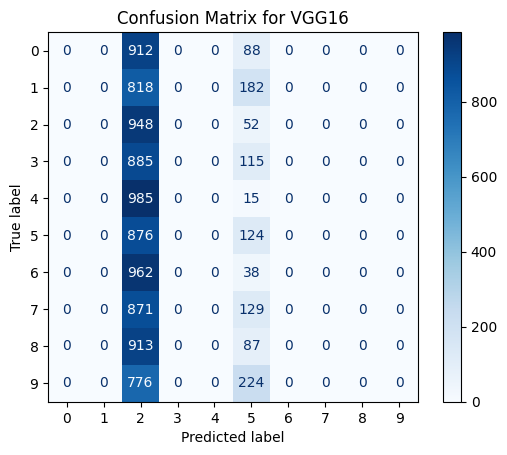

Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 270s 7s/step - accuracy: 0.1204 - loss: 2.5114 - val_accuracy: 0.1007 - val_loss: 19.5176
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 162s 5s/step - accuracy: 0.1678 - loss: 2.3002 - val_accuracy: 0.1205 - val_loss: 2.7793
313/313 ━━━━━━━━━━━━━━━━━━━━ 108s 334ms/step


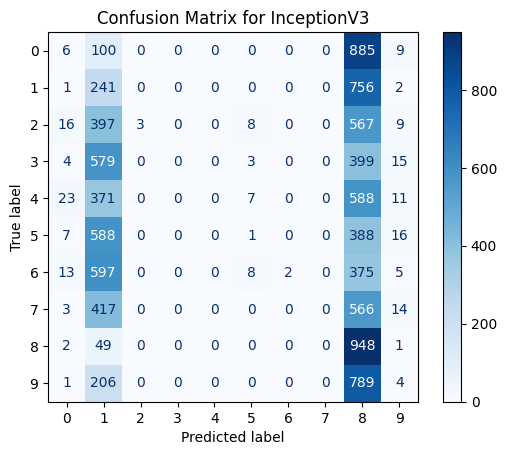

Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 453s 13s/step - accuracy: 0.1804 - loss: 5.4950 - val_accuracy: 0.1000 - val_loss: 48177616.0000
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 439s 13s/step - accuracy: 0.2141 - loss: 4.0222 - val_accuracy: 0.1000 - val_loss: 10900415.0000
313/313 ━━━━━━━━━━━━━━━━━━━━ 259s 821ms/step


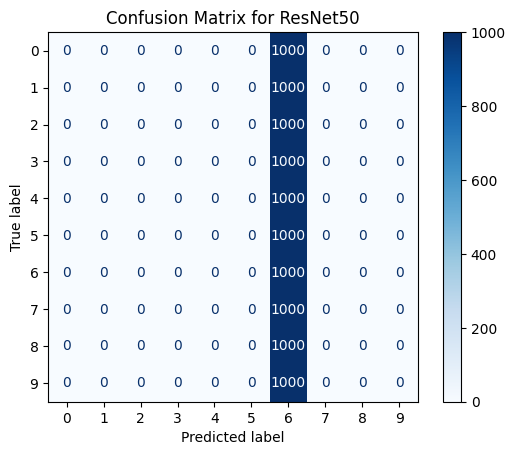

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 148s 4s/step - accuracy: 0.1697 - loss: 3.1152 - val_accuracy: 0.1168 - val_loss: 17.1360
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 107s 3s/step - accuracy: 0.2127 - loss: 2.3909 - val_accuracy: 0.1437 - val_loss: 13.2275
313/313 ━━━━━━━━━━━━━━━━━━━━ 49s 153ms/step


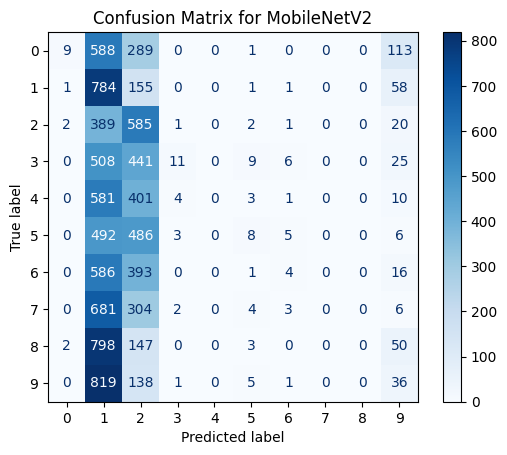

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 382s 9s/step - accuracy: 0.1656 - loss: 3.5472 - val_accuracy: 0.1000 - val_loss: 11528.0107
Epoch 2/2
32/32 ━━━━━━━━━━━━━━━━━━━━ 245s 8s/step - accuracy: 0.2063 - loss: 2.6258 - val_accuracy: 0.1302 - val_loss: 5703.1382
313/313 ━━━━━━━━━━━━━━━━━━━━ 178s 557ms/step


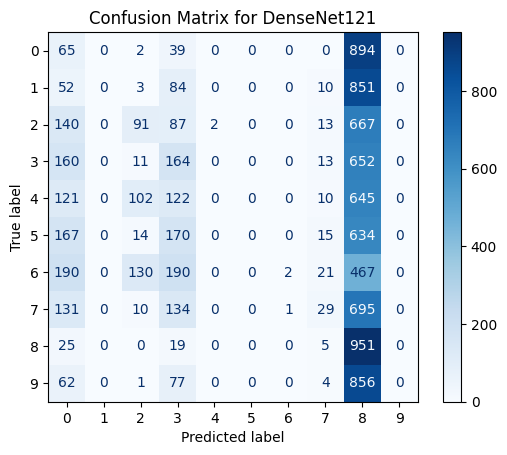

In [ ]:
  import numpy as np
  import matplotlib.pyplot as plt
  from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
  from tensorflow.keras.datasets import cifar10
  from tensorflow.keras.preprocessing.image import ImageDataGenerator
  from tensorflow.keras.applications import VGG16, InceptionV3, ResNet50, MobileNetV2, DenseNet121
  from tensorflow.keras.models import Sequential
  from tensorflow.keras.layers import Dense, Flatten
  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.layers import Input

  # CIFAR-10 veri setini indir ve yükle
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()

  # Veriyi [0, 1] aralığına ölçeklendir
  x_train = x_train.astype('float32') / 255.0
  x_test = x_test.astype('float32') / 255.0

  # Sınıf etiketlerini one-hot encode et
  num_classes = 10
  y_train = np.eye(num_classes)[y_train.reshape(-1)]
  y_test = np.eye(num_classes)[y_test.reshape(-1)]

  # Veri ön işleme
  datagen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              horizontal_flip=True)

  datagen.fit(x_train)

  # Transfer öğrenme modelleri
  models = {
      'VGG16': VGG16(weights='imagenet', include_top=False, input_shape=(75, 75, 3)),
      'InceptionV3': InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3)),
      'ResNet50': ResNet50(weights='imagenet', include_top=False, input_shape=(75, 75, 3)),
      'MobileNetV2': MobileNetV2(weights='imagenet', include_top=False, input_shape=(75, 75, 3)),
      'DenseNet121': DenseNet121(weights='imagenet', include_top=False, input_shape=(75, 75, 3))
  }

  # Model eğitimi ve karışıklık matrisinin oluşturulması
  for model_name, base_model in models.items():
      model = Sequential()
      model.add(Input(shape=(75, 75, 3)))
      model.add(base_model)
      model.add(Flatten())
      model.add(Dense(num_classes, activation='softmax'))

      model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

      # Eğitim (Resim boyutlarını ayarlama)
      x_train_resized = np.array([np.resize(img, (75, 75, 3)) for img in x_train[:1000]])  # İlk 1000 görüntü
      y_train_resized = y_train[:1000]
      x_test_resized = np.array([np.resize(img, (75, 75, 3)) for img in x_test])

      # Eğitim (Epoch sayısını 2 yap)
      model.fit(datagen.flow(x_train_resized, y_train_resized, batch_size=32), epochs=2, validation_data=(x_test_resized, y_test))

      # Test verisiyle tahmin yapma
      y_pred = model.predict(x_test_resized)
      y_pred_classes = np.argmax(y_pred, axis=1)

      # Gerçek etiketleri alma
      y_true = np.argmax(y_test, axis=1)

      # Karışıklık matrisinin oluşturulması
      cm = confusion_matrix(y_true, y_pred_classes)
      disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(num_classes)))

      # Karışıklık matrisinin görselleştirilmesi
      disp.plot(cmap=plt.cm.Blues)
      plt.title(f'Confusion Matrix for {model_name}')
      plt.show()
